In [538]:
import pandas as pd
import numpy as np
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt

path = "./transactions-ser"

all_files = glob.glob(os.path.join(path, "*.csv"))

all_df = []
for f in all_files:
    df = pd.read_csv(f, sep=';')
    df['file'] = f.split('/')[-1]
    all_df.append(df)

data = pd.concat(all_df, ignore_index=True)
merged_df = data.copy()
display(merged_df)

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,ancien_code_commune,ancien_nom_commune,id_parcelle,ancien_id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe,file
0,2022-360375,2022-04-21,1,Vente,260000.0,26.0,None,RUE DELILLE,582,76800,76575,Saint-Étienne-du-Rouvray,76,None,None,76575000AB0065,None,None,None,None,None,None,None,None,None,None,None,None,0,1,Maison,129.0,4.0,S,sols,None,None,351.0,1.071855,49.401886,000AB,transactions-ser\76575_000AB.csv
1,2022-360375,2022-04-21,1,Vente,260000.0,26.0,None,RUE DELILLE,582,76800,76575,Saint-Étienne-du-Rouvray,76,None,None,76575000AB0065,None,None,None,None,None,None,None,None,None,None,None,None,0,3,Dépendance,NaN,0.0,S,sols,None,None,351.0,1.071855,49.401886,000AB,transactions-ser\76575_000AB.csv
2,2021-1180016,2021-05-10,1,Vente,160000.0,13.0,None,RUE ALFRED DE MUSSET,40,76800,76575,Saint-Étienne-du-Rouvray,76,None,None,76575000AB0023,None,None,None,None,None,None,None,None,None,None,None,None,0,1,Maison,64.0,4.0,S,sols,None,None,452.0,1.070963,49.402764,000AB,transactions-ser\76575_000AB.csv
3,2021-1177880,2021-01-14,1,Vente,174000.0,21.0,None,RUE PAUL VERLAINE,1920,76800,76575,Saint-Étienne-du-Rouvray,76,None,None,76575000AB0012,None,None,None,None,None,None,None,None,None,None,None,None,0,1,Maison,64.0,4.0,S,sols,None,None,498.0,1.070475,49.403622,000AB,transactions-ser\76575_000AB.csv
4,2021-1177880,2021-01-14,1,Vente,174000.0,21.0,None,RUE PAUL VERLAINE,1920,76800,76575,Saint-Étienne-du-Rouvray,76,None,None,76575000AB0012,None,None,None,None,None,None,None,None,None,None,None,None,0,3,Dépendance,NaN,0.0,S,sols,None,None,498.0,1.070475,49.403622,000AB,transactions-ser\76575_000AB.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2967,2019-1112209,2019-02-11,1,Vente,56460.0,620.0,None,RUE ISAAC NEWTON,1222,76800,76575,Saint-Étienne-du-Rouvray,76,None,None,76575000BW0053,None,None,None,None,None,None,None,None,None,None,None,None,0,4,Local industriel. commercial ou assimilé,11002.0,0.0,S,sols,None,None,29103.0,NaN,NaN,000BW,transactions-ser\76575_000BW.csv
2968,2018-1037104,2018-12-28,1,Vente,1000000.0,9010.0,None,CHE DE LA MARE AUX SANGSUES,1605,76800,76575,Saint-Étienne-du-Rouvray,76,None,None,76575000BW0002,None,None,None,None,None,None,None,None,None,None,None,None,0,2,Appartement,87.0,3.0,S,sols,None,None,3973.0,1.059789,49.390736,000BW,transactions-ser\76575_000BW.csv
2969,2018-1037104,2018-12-28,1,Vente,1000000.0,9010.0,None,CHE DE LA MARE AUX SANGSUES,1605,76800,76575,Saint-Étienne-du-Rouvray,76,None,None,76575000BW0002,None,None,None,None,None,None,None,None,None,None,None,None,0,4,Local industriel. commercial ou assimilé,1048.0,0.0,S,sols,None,None,3973.0,1.059789,49.390736,000BW,transactions-ser\76575_000BW.csv
2970,2018-1033451,2018-07-04,1,Vente,165600.0,NaN,None,AV DE L UNIVERSITE,2359,76800,76575,Saint-Étienne-du-Rouvray,76,None,None,76575000BW0094,None,None,None,None,None,None,None,None,None,None,None,None,0,None,None,NaN,NaN,S,sols,None,None,1465.0,1.076805,49.385296,000BW,transactions-ser\76575_000BW.csv


In [539]:
# Récupèrer que les lignes qui contient appartement et maison
df = merged_df[(merged_df.type_local == 'Maison') | (merged_df.type_local == 'Appartement')]

In [540]:
to_drop = [column for column in df.columns if df[column].nunique() == 1]

df1 = df.drop(columns=to_drop)
#df1.drop(['file', 'type_local', 'code_postal', 'nature_culture_speciale','adresse_nom_voie','id_mutation','date_mutation'], axis=1, inplace=True)


In [541]:
df1['adresse_suffixe'].unique()
df1=df1.replace(to_replace='None', value=np.nan)

In [542]:
missing_rate = df1.isna().sum()/df1.shape[0]
missing_rate

id_mutation                     0.000000
date_mutation                   0.000000
numero_disposition              0.000000
nature_mutation                 0.000000
valeur_fonciere                 0.000000
adresse_numero                  0.000677
adresse_suffixe                 0.959405
adresse_nom_voie                0.000000
adresse_code_voie               0.000000
code_postal                     0.000000
id_parcelle                     0.000000
lot1_numero                     0.842355
lot1_surface_carrez             0.905277
lot2_numero                     0.918809
lot2_surface_carrez             0.981732
lot3_numero                     0.973613
lot3_surface_carrez             0.996617
nombre_lots                     0.000000
code_type_local                 0.000000
type_local                      0.000000
surface_reelle_bati             0.000000
nombre_pieces_principales       0.000000
code_nature_culture             0.158322
nature_culture                  0.158322
code_nature_cult

In [543]:
#Supprimer les colonnes ayant un messing_rate > 0.8
df1.drop(columns=['adresse_suffixe','lot1_numero', 'lot1_surface_carrez', 'lot2_numero','lot2_surface_carrez','lot3_numero','lot3_surface_carrez','code_nature_culture_speciale','nature_culture_speciale'], inplace=True)
#Supprimer les colonnes ayant d'autres colonnes les représentant avec des valeur (int, ....)
df1.drop(columns = ['adresse_nom_voie','nature_culture','file','id_mutation','code_postal','type_local','id_parcelle','adresse_code_voie'], inplace=True)
df1.dropna() #We can drop all the rows that have NaN, we don't lose a lot of data

,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,nombre_lots,code_type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,surface_terrain,longitude,latitude,section_prefixe
0,2022-04-21,1,Vente,260000.0,26.0,0,1,129.0,4.0,S,351.0,1.071855,49.401886,000AB
2,2021-05-10,1,Vente,160000.0,13.0,0,1,64.0,4.0,S,452.0,1.070963,49.402764,000AB
3,2021-01-14,1,Vente,174000.0,21.0,0,1,64.0,4.0,S,498.0,1.070475,49.403622,000AB
5,2020-03-10,1,Vente,200000.0,2.0,0,2,18.0,1.0,S,105.0,1.074902,49.403036,000AB
7,2019-08-28,1,Vente,180000.0,28.0,0,1,108.0,5.0,S,348.0,1.071647,49.401956,000AB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2948,2017-09-13,1,Vente,145000.0,27.0,0,1,74.0,5.0,S,374.0,1.072432,49.400659,000BV
2949,2017-09-08,1,Vente,262500.0,5.0,0,1,102.0,5.0,S,434.0,1.069653,49.399310,000BV
2950,2017-09-08,1,Vente,130000.0,25.0,0,1,64.0,4.0,S,369.0,1.072534,49.400600,000BV
2951,2017-09-01,1,Vente,189300.0,20.0,0,1,80.0,4.0,S,354.0,1.071759,49.399769,000BV


array([[<AxesSubplot:title={'center':'numero_disposition'}>,
        <AxesSubplot:title={'center':'valeur_fonciere'}>,
        <AxesSubplot:title={'center':'adresse_numero'}>],
       [<AxesSubplot:title={'center':'nombre_lots'}>,
        <AxesSubplot:title={'center':'surface_reelle_bati'}>,
        <AxesSubplot:title={'center':'nombre_pieces_principales'}>],
       [<AxesSubplot:title={'center':'surface_terrain'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>]], dtype=object)

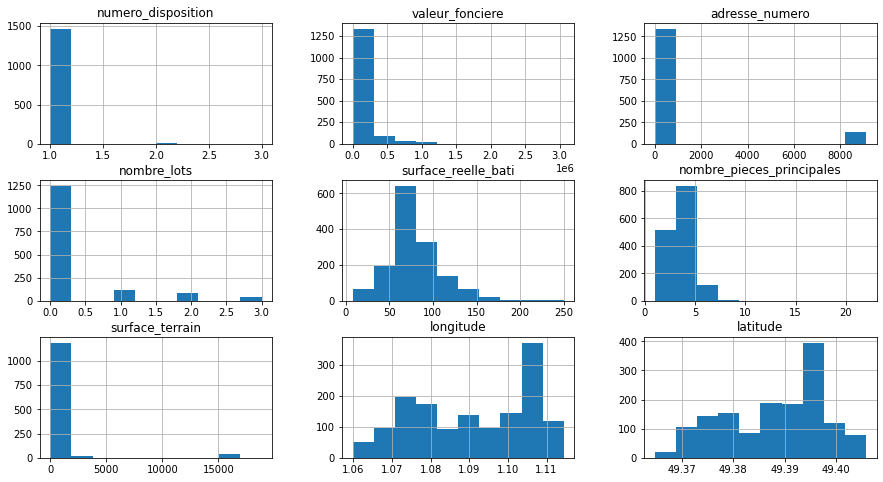

In [544]:
df1.hist(figsize=(15,8))

<AxesSubplot:>

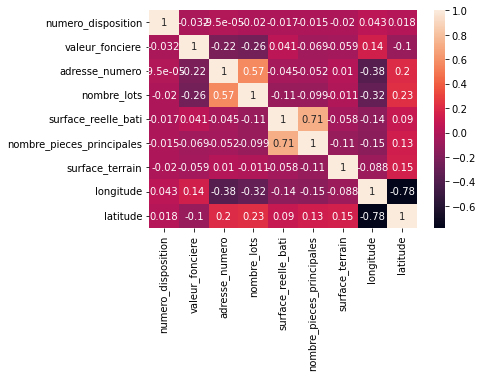

In [545]:
sns.heatmap(df1.corr(), annot=True)

In [546]:
df1['annee_mutation'] = df1['date_mutation'].apply(lambda x: x.split('-')[0])
df1['annee_mutation']= df1['annee_mutation'].astype(int)
df1 = df1.drop(['date_mutation'], axis=1)

In [547]:
code = {'Vente': 0,
        'Adjudication': 1,
        'Vente en l\'état futur d\'achèvement': 2,
        'S':0,
        'AG':1,
        'J':2,
        'L':3,
        'AB':4,
        '1':1,
        '2':2,
        '000AB': 0, '000AC': 1, '000AD': 2, '000AE': 3, '000AH': 4, '000AI': 5, '000AK': 6, '000AO': 7, '000AP': 8,
        '000AR': 9, '000AS': 10, '000AT': 11, '000AV': 12, '000AW': 13, '000AX': 14, '000AY': 15, '000AZ': 16, '000BC': 17,
        '000BD': 18, '000BE': 19, '000BH': 20, '000BK': 21, '000BL': 22, '000BM': 23, '000BO': 24, '000BP': 25, '000BR': 26,
        '000BS': 27, '000BT': 28, '000BV': 29, '000BW': 30
       }

for col in df1.select_dtypes('object'):
    df1[col] = df1[col].map(code)

array([[<AxesSubplot:title={'center':'numero_disposition'}>,
        <AxesSubplot:title={'center':'nature_mutation'}>,
        <AxesSubplot:title={'center':'valeur_fonciere'}>,
        <AxesSubplot:title={'center':'adresse_numero'}>],
       [<AxesSubplot:title={'center':'nombre_lots'}>,
        <AxesSubplot:title={'center':'code_type_local'}>,
        <AxesSubplot:title={'center':'surface_reelle_bati'}>,
        <AxesSubplot:title={'center':'nombre_pieces_principales'}>],
       [<AxesSubplot:title={'center':'code_nature_culture'}>,
        <AxesSubplot:title={'center':'surface_terrain'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'section_prefixe'}>,
        <AxesSubplot:title={'center':'annee_mutation'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

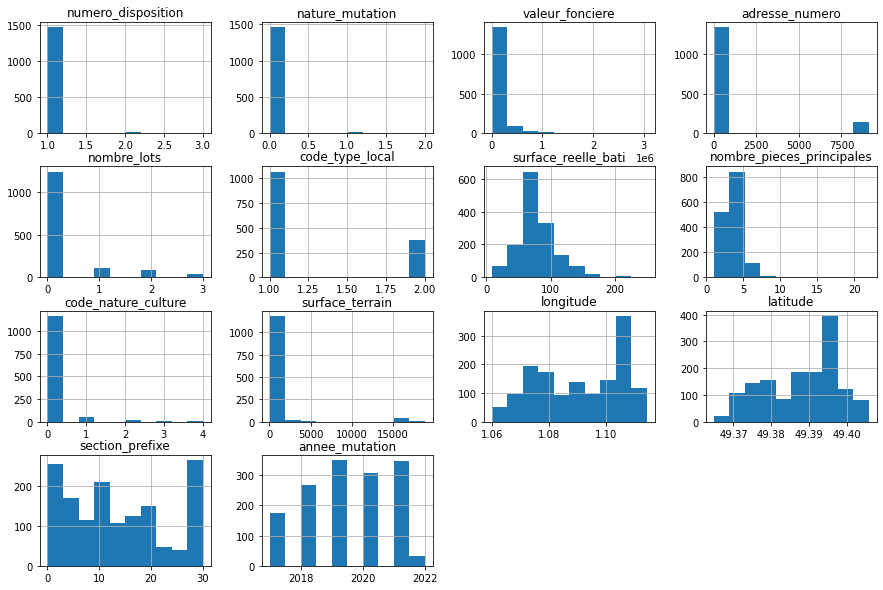

In [554]:
#print(df1['section_prefixe'].unique())
df1.hist(figsize=(15,10))

<AxesSubplot:>

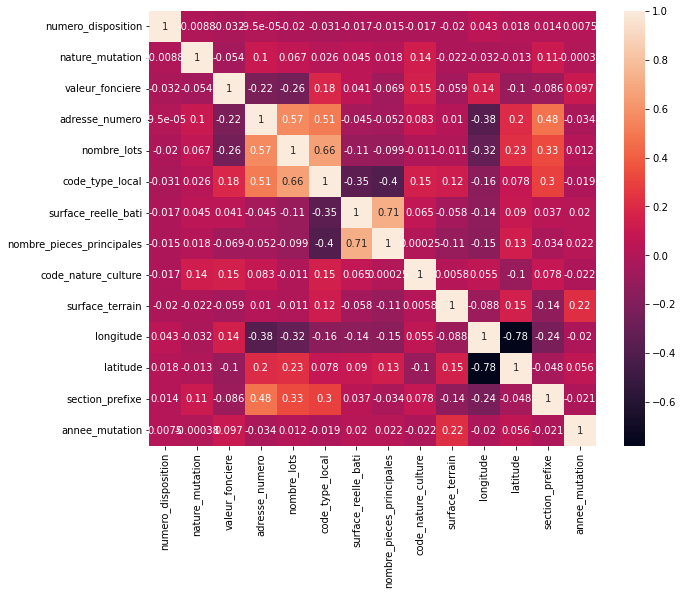

In [551]:
ig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df1.corr(), annot=True, ax=ax)